In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# from sklearn.gaussian_process import GaussianProcess

In [2]:
%matplotlib inline

# subroutines

In [95]:
## diversity
def shannon(oneD_array, total=100):
    shannon = 0
    for item in oneD_array:
        if item != 0:
            if total == 100:
                item = item / 100.0
                
            shannon += item * np.log(item)
    shannon *= -1
    shannon = round(shannon, 5)
    return shannon

# test_profile = pd.read_table('C:\Users\pengye\Desktop\\tmp\\annotated.mOTU.abundances.original')
# shannon(test_profile.ix[:, 1])

## get df of a specific taxo level
def taxoLevel(profile, level, data='df'):
    """
    PROFILE should be a DataFrame or a Series (indicates by key word DATA), by default, data == 'df' (DataFrame)
    
    LEVEL indicates which level of taxonomy profile you want to get
    for instance, 
        >>> taxoLevel(df_profile_with_month.ix[:2, :], 'k', 'df')
    gives you,
        >>>
            	k__Archaea	k__Bacteria	k__Eukaryota	k__Viruses
            10_12M	0	100.0000	0	0.0000
            10_20150812	0	99.9958	0	0.0042
    """
    result = pd.DataFrame()
    if data=='df':
        for item in profile.columns:
            short = item.split('|')[-1].split('__')[0]
            if short == level:
                result[item] = pd.to_numeric(profile[item])
        # result = result.to_numeric
        
    else:
        result = pd.Series()
        for item in profile.index:
            short = item.split('|')[-1].split('__')[0]
            if short == level:
                result[item] = profile[item]
        result = pd.to_numeric(result)
    return result

# data

## loading

In [146]:
df_age = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758sample.age.csv', sep='\t')
df_rxn = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.rxn.profile', sep='\t').T
df_motu = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.mOTU.profile', sep='\t').T
df_ko = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.ko.profile', sep='\t').T
df_go = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.go.profile', sep='\t').T
df_ec = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.ec.profile', sep='\t').T
df_pwy = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.pwy.profile', sep='\t').T
df_bug = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\all.798.bug.profile_newCol.txt', sep='\t').T

# df_gf = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.genefamilies.profile', sep='\t')
# this file is too big, and it takes too much memory, so it will be processed especially later.

In [174]:
df_bug_s = taxoLevel(df_bug, 's', data='df')
list_bug_spec_div = [shannon(df_bug_s.ix[i, :]) for i in range(len(df_bug_s.index))]
df_bug['spec_diversity'] = list_bug_spec_div

list_rxn_div = [shannon(df_rxn.ix[i, :], total=1) for i in range(len(df_rxn.index))]
df_rxn['rxn_diversity'] = list_rxn_div

list_motu_div = [shannon(df_motu.ix[i, :], total=1) for i in range(len(df_motu.index))]
df_motu['motu_diversity'] = list_motu_div

list_ko_div = [shannon(df_ko.ix[i, :], total=1) for i in range(len(df_ko.index))]
df_ko['ko_diversity'] = list_ko_div

list_go_div = [shannon(df_go.ix[i, :], total=1) for i in range(len(df_go.index))]
df_go['go_diversity'] = list_go_div

list_ec_div = [shannon(df_ec.ix[i, :], total=1) for i in range(len(df_ec.index))]
df_ec['ec_diversity'] = list_ec_div

list_pwy_div = [shannon(df_pwy.ix[i, :], total=1) for i in range(len(df_pwy.index))]
df_pwy['pwy_diversity'] = list_pwy_div

In [175]:
df_all_but_gf = pd.concat([df_rxn, df_ko, df_go, df_ec, df_pwy, df_motu, df_bug], axis=1, join='inner')
# df_all_but_gf.ix[750, 0] /df_all_but_gf.ix[:, 0].max()

In [895]:
# save file
df_all_but_gf.to_csv('C:\Users\pengye\Desktop\infantGMG\data\\df_all_but_gf.csv', sep='\t')

In [3]:
# load file
df_all_but_gf = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\df_all_but_gf.csv', sep='\t')
df_age = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758sample.age.csv', sep='\t')

C:\Users\pengye\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3006: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
# 739 smpl, both included in df_age and df_profile
list_age_and_profile = list(set(df_age.index) & set(df_all_but_gf.index))
df_age_739 = df_age.ix[list_age_and_profile]
df_all_but_gf_739 = df_all_but_gf.ix[list_age_and_profile]

In [142]:
# 721 smpl, select from 739 smpl with age less than or equal to 36 months
df_age_721_le36 = df_age_739[df_age_739['month'] <= 36]
df_all_but_gf_721 = df_all_but_gf.ix[df_age_721_le36.index]

# ge 36
df_age_ge36 = df_age_739[df_age_739['month'] > 36]
df_all_but_gf_ge36 = df_all_but_gf.ix[df_age_ge36.index]

## trim 0, 4, 12M

In [ ]:
# 460 smpl, trimmed from 721 smpl with age less than or equal to 36 months

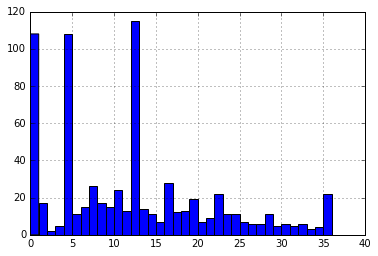

In [6]:
df_age_721_le36['month'].hist(bins=36)

In [7]:
list_0_4_12M_all_smpl = [x for x in df_age_721_le36.index if 'M' in x or 'B' in x]
#df_age_460
np.random.seed(4)
list_0_4_12M_261_smpl = [x for x in np.random.permutation(list_0_4_12M_all_smpl)[39:]]

In [8]:
df_all_but_gf_460 = df_all_but_gf_721.drop(list_0_4_12M_261_smpl)
df_age_460_le36 = df_age_721_le36.drop(list_0_4_12M_261_smpl)

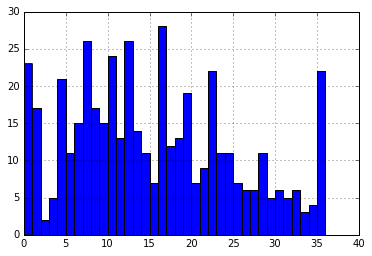

In [173]:
df_age_460_le36['month'].hist(bins=36)

count    460.000000
mean      15.041304
std        9.718726
min        0.000000
25%        7.000000
50%       14.000000
75%       22.000000
max       36.000000
Name: month, dtype: float64

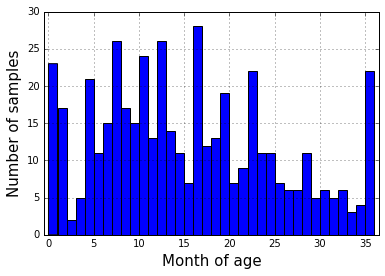

In [212]:
plt.figure(facecolor='white')
ax = plt.gca()

ax.hist(df_age_460_le36['month'], bins=36)
plt.xlabel('Month of age', fontsize=15)
plt.ylabel('Number of samples', fontsize=15)
ax.set_xlim(-.5, 36.5)
plt.grid()

df_age_460_le36['month'].describe()

## scaling with MinMaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
ndarray_all_but_gf_scaled_721 = MinMaxScaler().fit_transform(df_all_but_gf_721)
df_all_but_gf_scaled_721 = pd.DataFrame(ndarray_all_but_gf_scaled_721)

df_all_but_gf_scaled_721.columns = df_all_but_gf_721.columns # just don't wanna convert df into ndarray (for later regression part, so...)
df_all_but_gf_scaled_721.index = df_all_but_gf_721.index

ndarray_all_but_gf_scaled_460 = MinMaxScaler().fit_transform(df_all_but_gf_460)
df_all_but_gf_scaled_460 = pd.DataFrame(ndarray_all_but_gf_scaled_460)
df_all_but_gf_scaled_460.columns = df_all_but_gf_460.columns
df_all_but_gf_scaled_460.index = df_all_but_gf_460.index

# feature selection

## by variance

In [12]:
from sklearn.feature_selection import VarianceThreshold 
# not used

In [13]:
all_460_profile_std = df_all_but_gf_460.describe().ix['std']

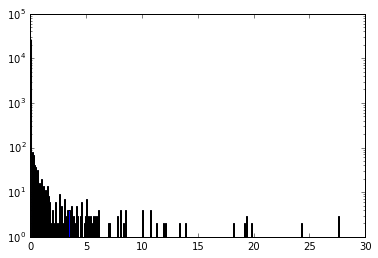

count    2.624300e+04
mean     5.809612e-02
std      7.438379e-01
min      0.000000e+00
25%      1.944394e-08
50%      9.432867e-06
75%      7.584917e-05
max      2.760225e+01
Name: std, dtype: float64

In [775]:
## not scaled
%matplotlib inline
plt.xlim(0,30)
plt.yscale('log')
plt.hist(all_460_profile_std, bins=300)
plt.show()
all_460_profile_std.describe()

In [14]:
all_460_profile_scaled_std = df_all_but_gf_scaled_460.describe().ix['std']

count    26243.000000
mean         0.098853
std          0.052335
min          0.000000
25%          0.054793
50%          0.079298
75%          0.142529
max          0.297135
Name: std, dtype: float64

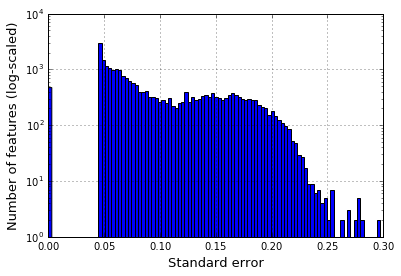

In [219]:
## scaled
plt.figure(facecolor='white')
ax = plt.gca()
plt.xlim(0,0.3)
plt.yscale('log')
ax.hist(all_460_profile_scaled_std, bins=100)
ax.set_xlabel('Standard error', fontsize=13)
ax.set_ylabel('Number of features (log-scaled)', fontsize=13)
plt.grid()
all_460_profile_scaled_std.describe()

In [16]:
sr_std_460_profile_scaled_ge_75 = all_460_profile_scaled_std[all_460_profile_scaled_std >= all_460_profile_scaled_std.quantile(.75)]

## by correlation coefficient

In [17]:
sr_corr_month_and_profile = df_all_but_gf_scaled_460.corrwith(df_age_460_le36['month'])
sr_corr_day_and_profile = df_all_but_gf_scaled_460.corrwith(df_age_460_le36['days'])

count    25771.000000
mean        -0.075037
std          0.206416
min         -0.624019
25%         -0.168780
50%         -0.035621
75%          0.051102
max          0.598986
dtype: float64

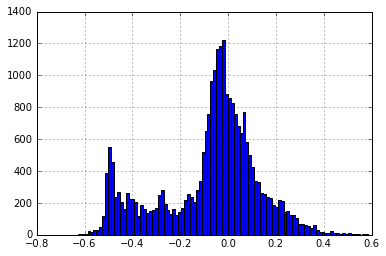

In [18]:
plt.figure(facecolor='white')
sr_corr_month_and_profile.hist(bins=100)
sr_corr_month_and_profile.describe()

count    25771.000000
mean        -0.073807
std          0.203538
min         -0.616259
25%         -0.166165
50%         -0.034961
75%          0.050503
max          0.590395
dtype: float64

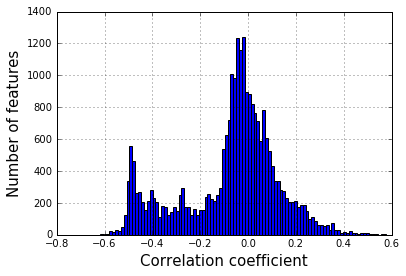

In [211]:
plt.figure(facecolor='white')
# sr_corr_day_and_profile.hist(bins=100)

sr_tmp = sr_corr_day_and_profile.dropna()
ax = plt.gca()
ax.hist(sr_tmp, bins=100)
ax.set_xlabel('Correlation coefficient', fontsize=15)
ax.set_ylabel('Number of features', fontsize=15)
plt.grid()
sr_corr_day_and_profile.describe()

In [20]:
sr_corr_month_abs_ge_03 = sr_corr_month_and_profile[sr_corr_month_and_profile**2>=0.09]
sr_corr_day_abs_ge_03 = sr_corr_day_and_profile[sr_corr_day_and_profile**2>=0.09]

print 'Union:', len(set(sr_corr_month_abs_ge_03.index) | set(sr_corr_day_abs_ge_03.index))
print 'Symmetric Difference:', len(set(sr_corr_month_abs_ge_03.index) ^ set(sr_corr_day_abs_ge_03.index))

Union: 4978
Symmetric Difference: 96


In [21]:
list_abs_ge_03_union_d_m = list(set(sr_corr_month_abs_ge_03.index) | set(sr_corr_day_abs_ge_03.index))

## select according to variance (ge 75%) and corr (abs ge 0.2, union)

In [22]:
set_q75 = set(sr_std_460_profile_scaled_ge_75.index)
set_c03 = set(list_abs_ge_03_union_d_m)
only_q75 = len(set_q75 - set_c03)
only_c03 = len(set_c03 - set_q75)
both_q75_c03 = len(set_c03 & set_q75)

In [313]:

import pip

def install(package):
   pip.main(['install', package])

install('matplotlib-venn')


You are using pip version 8.0.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [314]:
from matplotlib_venn import venn2

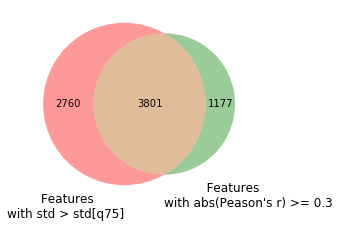

In [345]:
%matplotlib inline
plt.figure(figsize=(4, 4))
venn2(subsets=(only_q75, only_c03, both_q75_c03), set_labels=('Features        \nwith std > std[q75]', '           Features\nwith abs(Peason\'s r) >= 0.3'))
plt.show()

In [24]:
list_c03_d_m_AND_q75 = list(set_c03 & set_q75)

In [25]:
df_all_but_gf_scaled_460_c03_d_m_AND_q75 = df_all_but_gf_scaled_460[list_c03_d_m_AND_q75]

## select using RF

In [26]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [27]:
X = df_all_but_gf_scaled_460_c03_d_m_AND_q75

# use 'month'
y = df_age_460_le36['month']

In [28]:
regr_rf = rfr(max_depth=30, random_state=2)
regr_rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

Feature ranking:
1. feature 3469 (0.508315), 0.508315
2. feature 2522 (0.022306), 0.530621
3. feature 153 (0.014166), 0.544787
4. feature 270 (0.010820), 0.555607
5. feature 2218 (0.010596), 0.566203
6. feature 1189 (0.009832), 0.576035
7. feature 1914 (0.009793), 0.585828
8. feature 3591 (0.009734), 0.595562
9. feature 927 (0.009551), 0.605113
10. feature 647 (0.009293), 0.614406
11. feature 62 (0.007509), 0.621915
12. feature 2593 (0.007461), 0.629376
13. feature 2448 (0.006347), 0.635722
14. feature 512 (0.006341), 0.642064
15. feature 2412 (0.006239), 0.648303
16. feature 981 (0.005875), 0.654179
17. feature 2712 (0.005844), 0.660022
18. feature 460 (0.005599), 0.665621
19. feature 866 (0.005197), 0.670818
20. feature 2528 (0.005159), 0.675977
21. feature 1973 (0.005112), 0.681089
22. feature 910 (0.004993), 0.686082
23. feature 2738 (0.004822), 0.690904
24. feature 1033 (0.004487), 0.695392
25. feature 323 (0.004254), 0.699645
26. feature 1546 (0.004092), 0.703737
27. feature 598 

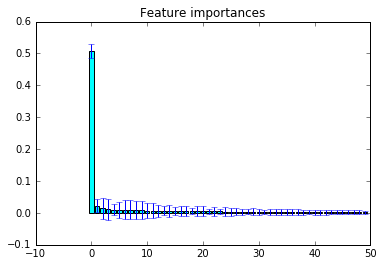

In [29]:
# pd.Series(regr_rf.feature_importances_).plot()

importances = regr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

list_idx = []
cumsum = 0
for f in range(X.shape[1]):
    cumsum += float(importances[indices[f]])
    list_idx.append(indices[f])
    print("%d. feature %d (%f), %f" % (f + 1, indices[f], importances[indices[f]], cumsum))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(50), importances[indices[:50]],
       color="cyan", yerr=std[indices[:50]], align="center")

# plt.bar(range(X.shape[1]), importances[indices],
#       color="cyan", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
plt.show()

In [346]:
a = '''1. feature 3469 (0.508315), 0.508315
2. feature 2522 (0.022306), 0.530621
3. feature 153 (0.014166), 0.544787
4. feature 270 (0.010820), 0.555607
5. feature 2218 (0.010596), 0.566203
6. feature 1189 (0.009832), 0.576035
7. feature 1914 (0.009793), 0.585828
8. feature 3591 (0.009734), 0.595562
9. feature 927 (0.009551), 0.605113
10. feature 647 (0.009293), 0.614406
11. feature 62 (0.007509), 0.621915
12. feature 2593 (0.007461), 0.629376
13. feature 2448 (0.006347), 0.635722
14. feature 512 (0.006341), 0.642064
15. feature 2412 (0.006239), 0.648303
16. feature 981 (0.005875), 0.654179
17. feature 2712 (0.005844), 0.660022
18. feature 460 (0.005599), 0.665621
19. feature 866 (0.005197), 0.670818
20. feature 2528 (0.005159), 0.675977
21. feature 1973 (0.005112), 0.681089
22. feature 910 (0.004993), 0.686082
23. feature 2738 (0.004822), 0.690904
24. feature 1033 (0.004487), 0.695392
25. feature 323 (0.004254), 0.699645
26. feature 1546 (0.004092), 0.703737
27. feature 598 (0.003896), 0.707633
28. feature 469 (0.003871), 0.711504
29. feature 3460 (0.003749), 0.715253
30. feature 214 (0.003671), 0.718924
31. feature 1800 (0.003415), 0.722339
32. feature 378 (0.003392), 0.725731
33. feature 2677 (0.003355), 0.729086
34. feature 2954 (0.003339), 0.732425
35. feature 864 (0.003321), 0.735746
36. feature 752 (0.003314), 0.739060
37. feature 3390 (0.003258), 0.742318
38. feature 3102 (0.002920), 0.745238
39. feature 2786 (0.002625), 0.747863
40. feature 652 (0.002623), 0.750485
41. feature 30 (0.002612), 0.753097
42. feature 2950 (0.002591), 0.755688
43. feature 2055 (0.002569), 0.758258
44. feature 2970 (0.002472), 0.760730
45. feature 3176 (0.002452), 0.763181
46. feature 2224 (0.002437), 0.765618
47. feature 596 (0.002406), 0.768023
48. feature 3434 (0.002314), 0.770337
49. feature 2646 (0.002269), 0.772606
50. feature 714 (0.002250), 0.774857
51. feature 688 (0.002228), 0.777085
52. feature 2633 (0.002165), 0.779250
53. feature 2758 (0.002138), 0.781388
54. feature 1239 (0.002096), 0.783484
55. feature 2962 (0.002081), 0.785565
56. feature 2447 (0.002076), 0.787641
57. feature 1815 (0.002067), 0.789708
58. feature 2676 (0.002064), 0.791772
59. feature 3295 (0.001952), 0.793724
60. feature 3099 (0.001895), 0.795619
61. feature 1445 (0.001801), 0.797420
62. feature 3116 (0.001784), 0.799204
63. feature 548 (0.001778), 0.800982
64. feature 717 (0.001754), 0.802736
65. feature 3606 (0.001749), 0.804485
66. feature 1455 (0.001744), 0.806229
67. feature 3244 (0.001736), 0.807965
68. feature 2312 (0.001731), 0.809696
69. feature 105 (0.001729), 0.811425
70. feature 1790 (0.001665), 0.813090
71. feature 2506 (0.001646), 0.814736
72. feature 549 (0.001608), 0.816343
73. feature 2435 (0.001589), 0.817932
74. feature 2205 (0.001557), 0.819489
75. feature 1323 (0.001537), 0.821026
76. feature 3185 (0.001530), 0.822556
77. feature 936 (0.001526), 0.824082
78. feature 1910 (0.001504), 0.825586
79. feature 865 (0.001493), 0.827079
80. feature 1959 (0.001460), 0.828539
81. feature 2486 (0.001456), 0.829995
82. feature 326 (0.001455), 0.831450
83. feature 1926 (0.001439), 0.832889
84. feature 3232 (0.001420), 0.834309
85. feature 3527 (0.001413), 0.835722
86. feature 595 (0.001407), 0.837129
87. feature 2543 (0.001401), 0.838530
88. feature 1867 (0.001373), 0.839903
89. feature 3556 (0.001337), 0.841241
90. feature 157 (0.001324), 0.842565
91. feature 1231 (0.001321), 0.843886
92. feature 784 (0.001319), 0.845205
93. feature 3788 (0.001318), 0.846523
94. feature 3705 (0.001267), 0.847790
95. feature 400 (0.001246), 0.849036
96. feature 3355 (0.001227), 0.850263
97. feature 1858 (0.001218), 0.851481
98. feature 1960 (0.001212), 0.852693
99. feature 2240 (0.001209), 0.853902
100. feature 986 (0.001205), 0.855106
101. feature 662 (0.001204), 0.856310
102. feature 569 (0.001183), 0.857493
103. feature 3091 (0.001173), 0.858666
104. feature 2609 (0.001167), 0.859834
105. feature 3317 (0.001156), 0.860989
106. feature 2823 (0.001136), 0.862126
107. feature 3664 (0.001105), 0.863230
108. feature 406 (0.001101), 0.864332
109. feature 2775 (0.001086), 0.865418
110. feature 2840 (0.001082), 0.866500
111. feature 2986 (0.001081), 0.867581
112. feature 2217 (0.001076), 0.868657
113. feature 1007 (0.001075), 0.869731
114. feature 1952 (0.001071), 0.870802
115. feature 127 (0.001053), 0.871856
116. feature 3278 (0.001049), 0.872905
117. feature 185 (0.001043), 0.873947
118. feature 1958 (0.001042), 0.874990
119. feature 1014 (0.001040), 0.876030
120. feature 1884 (0.001037), 0.877067
121. feature 2426 (0.001031), 0.878098
122. feature 1684 (0.001015), 0.879113
123. feature 653 (0.001013), 0.880126
124. feature 3217 (0.001009), 0.881134'''

df_ = pd.DataFrame()

num_ = []
i_ = []
c_i_ = []

a_list = [x.strip() for x in a.split('\n')]
for line in a_list:
    line = line.split(' ')
    num, importance, cum_importance = int(line[0].replace('.', '')), line[3].replace('(', '').replace(')', '').replace(',', ''), line[-1]
    num_.append(num)
    i_.append(importance)
    c_i_.append(cum_importance)
    
df_['num'] = num_
df_['importance'] = i_
df_['cum_importance'] = c_i_

df_.to_csv('C:\Users\pengye\Desktop\infantGMG\data\\top124.feature.importance.table', sep='\t')

In [30]:
from sklearn.cross_validation import cross_val_score

In [348]:
y = df_age_460_le36['month']
tmp_regr_rf = rfr(max_depth=30, random_state=2)

idx = []
dict_score = {}
dict_score_mean = {}
dict_residual = {}

for i, id_ in enumerate(list_idx):
    idx.append(id_)
    x = df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, idx]
    tmp_regr_rf.fit(x, y)
    y_predict = tmp_regr_rf.predict(x)
    residual = y_predict - y
    residual = residual ** 2
    
    dict_score[i+1] = tmp_regr_rf.score(x, y)
    dict_score_mean[i+1] = cross_val_score(tmp_regr_rf, x, y).mean()
    dict_residual[i+1] = residual.sum()
    
    # print 'Processing feature %d' % i
    
    # according to feature importance info, select the top 124 features (with importance >= 0.001)
    if i == 123:
         break
    

In [349]:
cross_val_score(tmp_regr_rf, x, y)

array([ 0.648435  ,  0.65282242,  0.61457268])

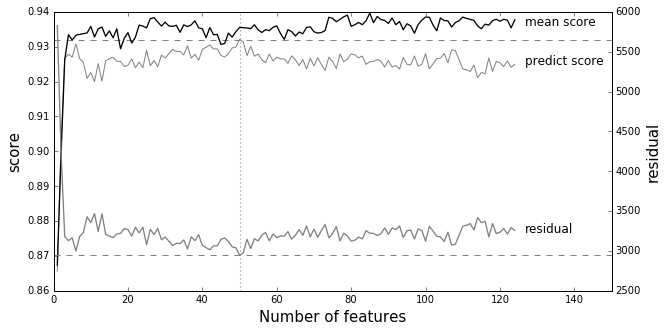

In [32]:
df_score_residual = pd.DataFrame([dict_score, dict_score_mean, dict_residual], index=['score', 'cross_val_score_mean', 'residual'])

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='white')
ax = plt.gca()

ax.plot(df_score_residual.ix['score'], c='grey', linestyle='-', linewidth=1)
ax.set_ylabel('score', color='k', fontsize=15)
ax.axhline(df_score_residual.ix['score'].max(), c='gray', linestyle='--')

ax1 = ax.twinx()
ax1.plot(df_score_residual.ix['cross_val_score_mean'], c='k', linewidth=1.3)
ax1.set_yticklabels([])
ax1.set_yticks([])
# ax1.set_ylabel('', color='grey')

ax2 = ax.twinx()
ax2.plot(df_score_residual.ix['residual'], c='gray', linestyle='-', linewidth=1.3)
ax2.set_ylabel('residual', color='k', fontsize=15)
ax2.axhline(df_score_residual.ix['residual'].min(), c='gray', linestyle='--')

ax.axvline(50, c='gray', linestyle=':', linewidth=1.2)
ax.set_xlabel('Number of features', fontsize=15)

plt.xlim(xmax=150)
ax.text(.845, .95, 'mean score', transform=ax.transAxes, color='k', fontsize=12)
ax.text(.845, .81, 'predict score', transform=ax.transAxes, color='k', fontsize=12)
ax.text(.845, .21, 'residual', transform=ax.transAxes, color='k', fontsize=12)


In [894]:
# save file
pd.Series(list_idx).to_csv('C:\Users\pengye\Desktop\infantGMG\data\\feature.importance.list')

In [33]:
list_50_f_loc = list_idx[:50]

df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_50 = df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_50_f_loc]
list_50_f_names = list(df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_50_f_loc].columns)

In [34]:
list_50_f_names

['k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae',
 'METH-ACETATE-PWY:methanogenesisfromacetate',
 'K03294',
 'K07177',
 'GLUDEG-I-PWY:GABAshunt',
 'K02074',
 '3.4.21.105',
 '3.4.19.3',
 'K03316',
 'CYTOCHROME-B5-REDUCTASE-RXN',
 'K02035',
 'K03488',
 'K07003',
 'K10778',
 'K06999',
 'K00681',
 'PWY-5101:L-isoleucinebiosynthesisII',
 'GO:0048638:BP:04:regulation of developmental growth',
 'K01338',
 'K04085',
 'PWY-5994:palmitatebiosynthesisI(animalsandfungi)',
 'Faecalibacterium_prausnitzii',
 'K15257',
 'motu_diversity',
 'RXN-14227',
 '1.5.1.39',
 'K15633',
 'K06218',
 'K16793',
 '1.2.1.9',
 'K07230',
 'K02598',
 'K00616',
 'K14067',
 'FUCPALDOL-RXN',
 'PWY-6969:TCAcycleV(2-oxoglutarate:ferredoxinoxidoreductase)',
 'K03835',
 '2.6.1.88',
 'K01238',
 'PWY-5857:ubiquinol-10biosynthesis(prokaryotic)',
 'K00982',
 'K11477',
 'K09998',
 'K07397',
 'K06381',
 'GO:0005328:MF:03:neurotransmitter:sodium symporter activity',
 'ADENYLATECYC-RXN',
 'RXN-13142',
 'K0

# model construction

## 50 features

In [261]:
x_50 = df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_50
y = df_age_460_le36['month']

regr_rf_50 = rfr(max_depth=30, random_state=2)
regr_rf_50.fit(x_50, y)
y_50 = regr_rf_50.predict(x_50)

corr_y__y_50 = np.corrcoef(list(y), list(y_50))[0, 1]

score_50 = regr_rf_50.score(x_50, y)
cross_val_50_mean = cross_val_score(regr_rf_50, x_50, y).mean()

In [259]:
## subroutine for plotting
def plotScatter(y_true, y_predict, title):
    plt.figure(facecolor='white')
    ax = plt.gca()
    plt.ylim(-5, 40)
    ax.scatter(y_predict, y_true, c='grey', edgecolors='grey', alpha=.6)
    ax.set_xticklabels(['', 0, 5, 10, 15, 20, 25, 30, 35])
    ax.set_yticklabels(['', 0, 5, 10, 15, 20, 25, 30, 35])
    ax.set_xlabel('Physiological age (month)', fontsize=12)
    ax.set_ylabel('Predicted age (month)', fontsize=13)
    ax.set_title(title, fontsize=15)
    
    corr_ = np.corrcoef(list(y_true), list(y_predict))[0, 1]
    ax.text(0, 35, "Pearson's $R^2$ = %.3f" % corr_**2, fontsize=10)
    
    ax1 = ax.twinx()
    ax1.plot((-.5, 36), (-.5, 36), c='k')
    ax1.set_yticklabels([])
    ax1.set_yticks([])
    plt.show()

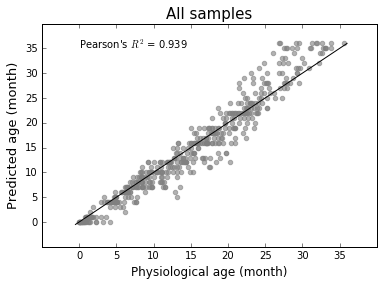

In [262]:
plotScatter(y, y_50, 'All samples')

## standard

In [91]:
def getPredictOfMonth(y_true, y_predict):
    dict_m = {}
    for true, predict in zip(y_true, y_predict):
        if true not in dict_m:
            dict_m[true] = [predict]
        else:
            dict_m[true].append(predict)
    return dict_m

def getStatsOfMonth(dict_m, func):
    
    df_stats = pd.DataFrame()
    for m, results in dict_m.items():
        df_stats[m] = [func(results)]
    return df_stats

In [ ]:
# month VS predict result
dict_50f_m_all = getPredictOfMonth(y, y_50)

array([[ 1.        ,  0.99348075],
       [ 0.99348075,  1.        ]])

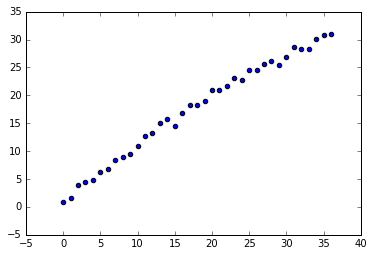

In [102]:
df_50f_m_mean = getStatsOfMonth(dict_50f_m_all, np.mean)
plt.scatter(df_50f_m_mean.columns, df_50f_m_mean)
np.corrcoef(df_50f_m_mean, pd.Series(df_50f_m_mean.columns))

array([[ 1.        ,  0.99299323],
       [ 0.99299323,  1.        ]])

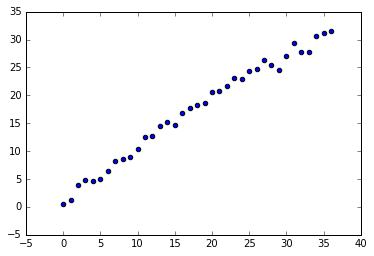

In [103]:
df_50f_m_median = getStatsOfMonth(dict_50f_m_all, np.median)
plt.scatter(df_50f_m_median.columns, df_50f_m_median)
np.corrcoef(df_50f_m_median, pd.Series(df_50f_m_median.columns))

In [104]:
df_50f_m_std = getStatsOfMonth(dict_50f_m_all, np.std)

In [296]:
print df_50f_m_std.T
print df_50f_m_mean

           0
0   1.068504
1   0.764299
2   2.350000
3   1.446928
4   1.270135
5   2.507740
6   1.847401
7   1.869092
8   1.421316
9   1.635631
10  1.899708
11  2.595513
12  2.537459
13  1.885728
14  2.377720
15  1.241789
16  1.817755
17  1.896488
18  1.655366
19  2.138332
20  1.493250
21  1.610383
22  1.353019
23  1.702550
24  1.186564
25  1.669046
26  1.387644
27  2.217168
28  2.281981
29  2.537400
30  2.198232
31  2.316376
32  2.389851
33  1.143095
34  2.714199
35  2.307641
36  2.717646
         0         1     2     3         4         5         6         7   \
0  0.921739  1.523529  3.85  4.42  4.909524  6.218182  6.766667  8.473077   

         8         9   ...       27         28     29         30     31  \
0  8.952941  9.393333  ...    25.65  26.072727  25.36  26.833333  28.68   

          32    33      34      35     36  
0  28.283333  28.3  30.025  30.775  30.98  

[1 rows x 37 columns]


In [365]:
df_50f_m_mean.T

,0
0,0.921739
1,1.523529
2,3.850000
3,4.420000
4,4.909524
5,6.218182
6,6.766667
7,8.473077
8,8.952941
9,9.393333


<Container object of 37 artists>

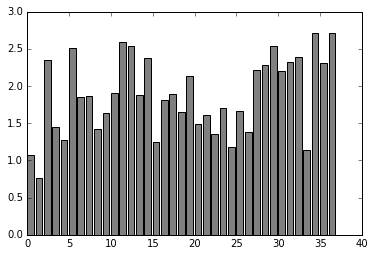

In [113]:
plt.bar(df_50f_m_std.columns, df_50f_m_std.ix[0, :], color='grey', edgecolor=None)

In [315]:
# Zscore calculator
def calZscore(month, gut_age, df_middle=df_50f_m_mean, df_std=df_50f_m_std):
    ref_middle = df_middle.ix[0, month]
    ref_std = df_std.ix[0, month]
    zscore = (gut_age - ref_middle) / ref_std
    rounded_zscore = '%.2f' % zscore
    process = '(%f - %f) / %f' % (gut_age, ref_middle, ref_std)
    return rounded_zscore, process

In [352]:
print calZscore(4, 7.1)
print calZscore(4, 5.5)
print calZscore(12, 13.3)
print calZscore(12, 9)

('1.72', '(7.100000 - 4.909524) / 1.270135')
('0.46', '(5.500000 - 4.909524) / 1.270135')
('0.05', '(13.300000 - 13.176923) / 2.537459')
('-1.65', '(9.000000 - 13.176923) / 2.537459')


In [304]:
df_50f_m_mean.ix[0, 4]

4.909523809523809

"\nax.plot(sr_loc, sr_mean + 2*sr_std, c='gray', linewidth=1)\nax.plot(sr_loc, sr_mean - 2*sr_std, c='gray', linewidth=1)\n\nax.plot(sr_loc, sr_mean + 3*sr_std, c='gray', linewidth=.8)\nax.plot(sr_loc, sr_mean - 3*sr_std, c='gray', linewidth=.8)\n"

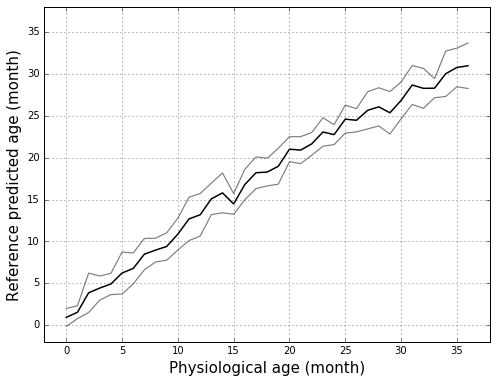

In [263]:
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()

sr_loc = df_50f_m_mean.columns
sr_mean = df_50f_m_mean.ix[0, :]
sr_std = df_50f_m_std.ix[0, :]

ax.plot(sr_loc, sr_mean, c='k', linewidth=1.5)

ax.plot(sr_loc, sr_mean + sr_std, c='gray', linewidth=1.2)
ax.plot(sr_loc, sr_mean - sr_std, c='gray', linewidth=1.2)
ax.set_xlabel('Physiological age (month)', fontsize=15)
ax.set_ylabel('Reference predicted age (month)', fontsize=15)

plt.xlim(-2, 38)
plt.ylim(-2, 38)
plt.grid()
"""
ax.plot(sr_loc, sr_mean + 2*sr_std, c='gray', linewidth=1)
ax.plot(sr_loc, sr_mean - 2*sr_std, c='gray', linewidth=1)

ax.plot(sr_loc, sr_mean + 3*sr_std, c='gray', linewidth=.8)
ax.plot(sr_loc, sr_mean - 3*sr_std, c='gray', linewidth=.8)
"""

# ax.scatter(y_3_smpl, y_rf_3_smpl)

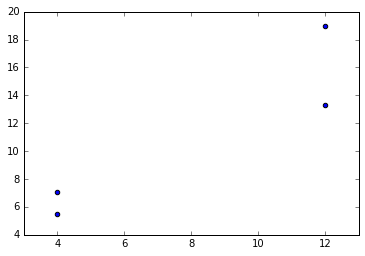

In [251]:
# fit independent smpl
# list_4_smpl_loc = list_0_4_12M_261_smpl#[8:12]

list_4_smpl_loc = ['335_4M', '172_4M', '12_12M', '133_12M']
x_4_smpl = df_all_but_gf.ix[list_4_smpl_loc, list_50_f_names]
y_4_smpl = df_age.ix[list_4_smpl_loc]['month']

y_rf_4_smpl = regr_rf_50.predict(x_4_smpl)

plt.scatter(y_4_smpl, y_rf_4_smpl)


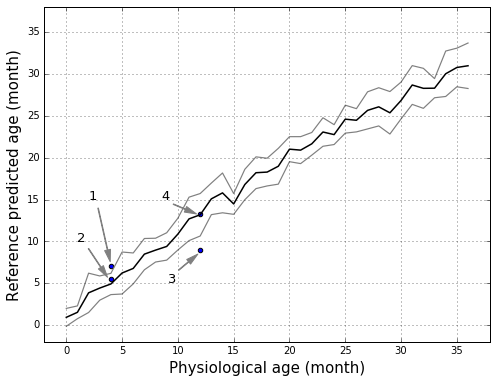

In [363]:
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()

sr_loc = df_50f_m_mean.columns
sr_mean = df_50f_m_mean.ix[0, :]
sr_std = df_50f_m_std.ix[0, :]

ax.plot(sr_loc, sr_mean, c='k', linewidth=1.5)

ax.plot(sr_loc, sr_mean + sr_std, c='gray', linewidth=1.2)
ax.plot(sr_loc, sr_mean - sr_std, c='gray', linewidth=1.2)
ax.set_xlabel('Physiological age (month)', fontsize=15)
ax.set_ylabel('Reference predicted age (month)', fontsize=15)

# ax.scatter(y_4_smpl, y_rf_4_smpl)

y_4_mock_smpl = y_4_smpl
y_rf_4_mock_smpl = y_rf_4_smpl
y_rf_4_mock_smpl[3] = 9

ax.scatter(y_4_mock_smpl, y_rf_4_mock_smpl)

ax.annotate('1', xy=(4, 7.2), xytext=(2, 15), arrowprops=dict(facecolor='gray', edgecolor='gray', shrink=0.05, width=.6, headwidth=6), transform=ax.transAxes, fontsize=13)
ax.annotate('2', xy=(3.8, 5.5), xytext=(1, 10), arrowprops=dict(facecolor='gray', edgecolor='gray', shrink=0.05, width=.6, headwidth=6), transform=ax.transAxes, fontsize=13)
# ax.annotate('3', xy=(12, 19.2), xytext=(10, 25), arrowprops=dict(facecolor='gray', edgecolor='gray', shrink=0.05, width=.6, headwidth=6), transform=ax.transAxes, fontsize=13)
ax.annotate('3', xy=(11.9, 8.6), xytext=(9, 5), arrowprops=dict(facecolor='gray', edgecolor='gray', shrink=0.05, width=.6, headwidth=6), transform=ax.transAxes, fontsize=13)
ax.annotate('4', xy=(11.8, 13.2), xytext=(8.5, 15), arrowprops=dict(facecolor='gray', edgecolor='gray', shrink=0.05, width=.6, headwidth=6), transform=ax.transAxes, fontsize=13)

plt.xlim(-2, 38)
plt.ylim(-2, 38)
plt.grid()

In [247]:
df_tmp_261 = pd.DataFrame([list_3_smpl_loc, list(y_3_smpl), list(y_rf_3_smpl)])

In [243]:
[(x, y) for (x, y) in zip(y_3_smpl, list(y_rf_3_smpl)) if abs(float(x)-float(y))<=1.5]


[(4, 5.5),
 (12, 13.300000000000001),
 (12, 13.300000000000001),
 (12, 13.300000000000001),
 (4, 5.5)]

In [250]:
for col in df_tmp_261.columns:
    if df_tmp_261.ix[2, col] <= 5.5 or df_tmp_261.ix[2, col] >= 13.3:
        print df_tmp_261.ix[:, col]

0    133_12M
1         12
2         19
Name: 0, dtype: object
0    338_4M
1         4
2      20.7
Name: 1, dtype: object
0    591_12M
1         12
2        5.5
Name: 3, dtype: object
0    367_12M
1         12
2         19
Name: 4, dtype: object
0    281_12M
1         12
2       20.7
Name: 5, dtype: object
0    39_12M
1        12
2        19
Name: 7, dtype: object
0    383_12M
1         12
2         19
Name: 9, dtype: object
0    78_12M
1        12
2        19
Name: 12, dtype: object
0    282_12M
1         12
2         19
Name: 19, dtype: object
0    622_4M
1         4
2        19
Name: 22, dtype: object
0    532_12M
1         12
2         19
Name: 23, dtype: object
0    536_12M
1         12
2         19
Name: 25, dtype: object
0    276_4M
1         4
2        19
Name: 26, dtype: object
0    622_12M
1         12
2         19
Name: 27, dtype: object
0    624_12M
1         12
2         19
Name: 28, dtype: object
0    38_12M
1        12
2      19.7
Name: 30, dtype: object
0    70_12M
1    

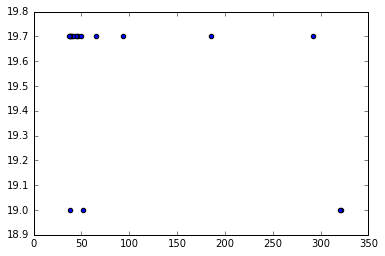

In [149]:
# df_all_but_gf_ge36

list_ge36_loc = list(df_age_ge36.index)
x_ge36_smpl = df_all_but_gf.ix[list_ge36_loc, list_50_f_names]
y_ge36_smpl = df_age.ix[list_ge36_loc]['month']

y_rf_ge36_smpl = regr_rf_50.predict(x_ge36_smpl)
plt.scatter(y_ge36_smpl, y_rf_ge36_smpl)

In [146]:
df_age_ge36

(18, 3)

## train_test

In [40]:
from sklearn.cross_validation import train_test_split

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=3)

X_train4, X_test4, y_train4, y_test4 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=4)

X_train5, X_test5, y_train5, y_test5 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=5)

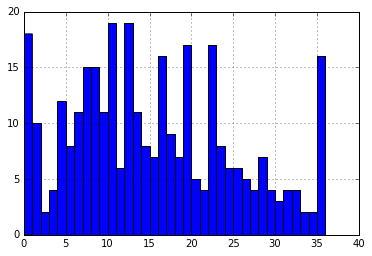

In [42]:
y_train1.hist(bins=36)

In [43]:
regr_rf_subtest_1 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_1.fit(X_train1, y_train1)

y_rf_train1 = regr_rf_subtest_1.predict(X_train1)
y_rf_test1 = regr_rf_subtest_1.predict(X_test1)

In [44]:
regr_rf_subtest_2 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_2.fit(X_train2, y_train2)

y_rf_train2 = regr_rf_subtest_2.predict(X_train2)
y_rf_test2 = regr_rf_subtest_2.predict(X_test2)

In [45]:
regr_rf_subtest_3 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_3.fit(X_train3, y_train3)

y_rf_train3 = regr_rf_subtest_3.predict(X_train3)
y_rf_test3 = regr_rf_subtest_3.predict(X_test3)

In [46]:
regr_rf_subtest_4 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_4.fit(X_train4, y_train4)

y_rf_train4 = regr_rf_subtest_4.predict(X_train4)
y_rf_test4 = regr_rf_subtest_4.predict(X_test4)

In [47]:
regr_rf_subtest_5 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_5.fit(X_train5, y_train5)

y_rf_train5 = regr_rf_subtest_5.predict(X_train5)
y_rf_test5 = regr_rf_subtest_5.predict(X_test5)

In [48]:
# from sklearn.metrics import roc_curve, auc
# STUPID!! This only works for classification

### Training_test 1

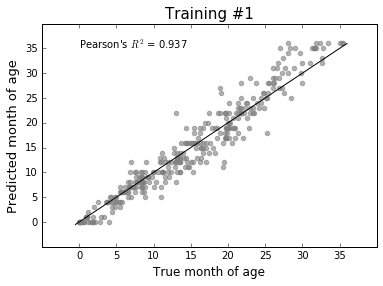

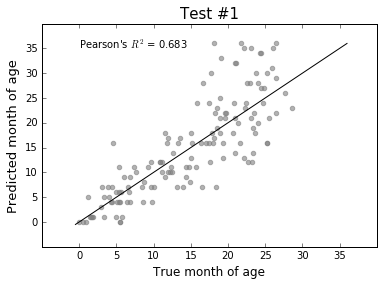

In [49]:
plotScatter(y_train1, y_rf_train1, 'Training #1')
plotScatter(y_test1, y_rf_test1, 'Test #1')

### Training_test 2

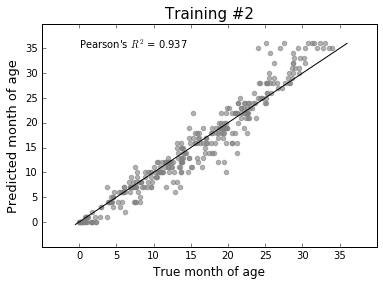

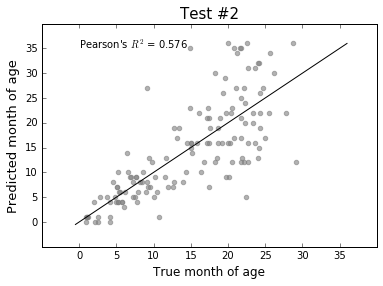

In [50]:
plotScatter(y_train2, y_rf_train2, 'Training #2')
plotScatter(y_test2, y_rf_test2, 'Test #2')

### Training_test 3

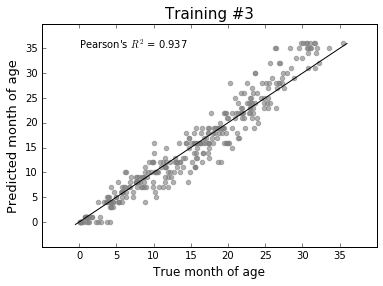

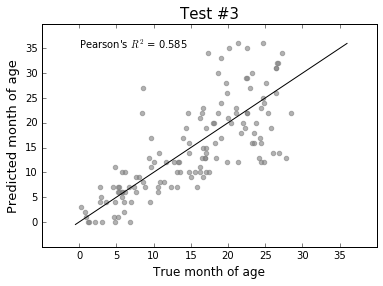

In [51]:
plotScatter(y_train3, y_rf_train3, 'Training #3')
plotScatter(y_test3, y_rf_test3, 'Test #3')

### Training_test 4

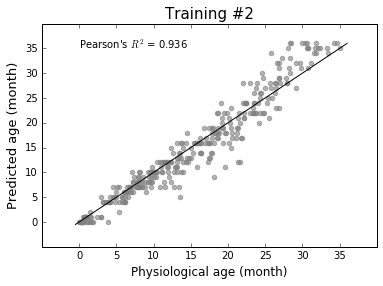

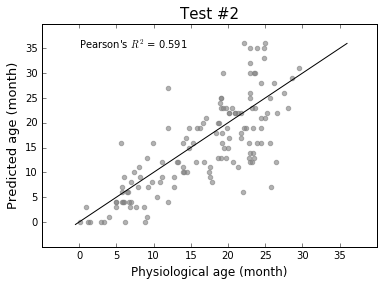

In [351]:
plotScatter(y_train4, y_rf_train4, 'Training #2')
plotScatter(y_test4, y_rf_test4, 'Test #2')

### Training_test 5

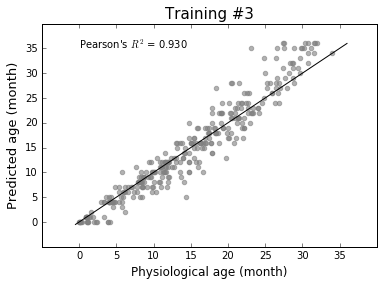

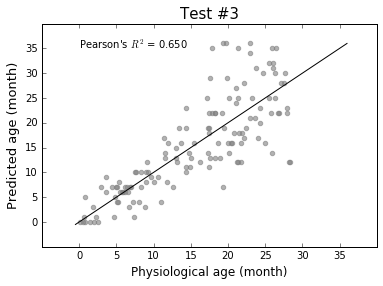

In [350]:
plotScatter(y_train5, y_rf_train5, 'Training #3')
plotScatter(y_test5, y_rf_test5, 'Test #3')

### median result of 3 -> R^2

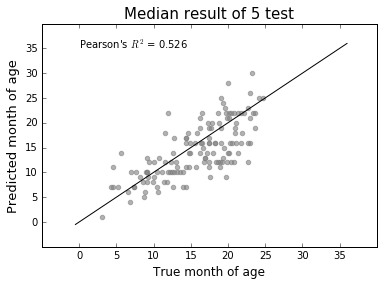

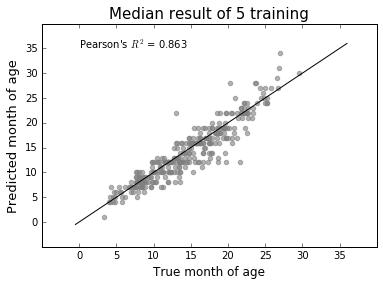

In [54]:
mdn_5_test_predict_y = np.median([y_rf_test1, y_rf_test2, y_rf_test3, y_rf_test4, y_rf_test5], axis=0)
mdn_5_test_true_y = np.median([y_test1, y_test2, y_test3, y_test4, y_test5], axis=0)
plotScatter(mdn_5_test_true_y, mdn_5_test_predict_y, 'Median result of 5 test')

mdn_5_train_predict_y = np.median([y_rf_train1, y_rf_train2, y_rf_train3, y_rf_train4, y_rf_train5], axis=0)
mdn_5_train_true_y = np.median([y_train1, y_train2, y_train3, y_train4, y_train5], axis=0)
plotScatter(mdn_5_train_true_y, mdn_5_train_predict_y, 'Median result of 5 training')

### average result of 3 -> R^2

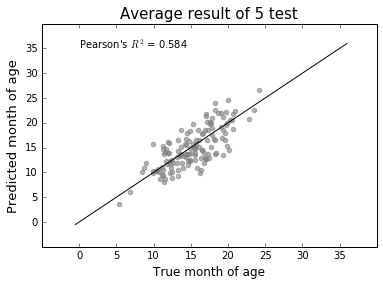

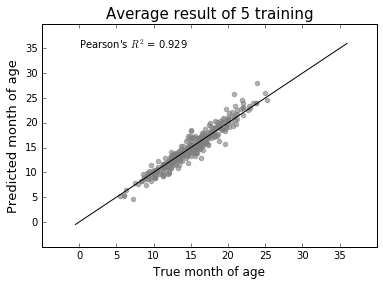

In [55]:
ave_5_test_predict_y = np.mean([y_rf_test1, y_rf_test2, y_rf_test3, y_rf_test4, y_rf_test5], axis=0)
ave_5_test_true_y = np.mean([y_test1, y_test2, y_test3, y_test4, y_test5], axis=0)
plotScatter(ave_5_test_true_y, ave_5_test_predict_y, 'Average result of 5 test')

ave_5_train_predict_y = np.mean([y_rf_train1, y_rf_train2, y_rf_train3, y_rf_train4, y_rf_train5], axis=0)
ave_5_train_true_y = np.mean([y_train1, y_train2, y_train3, y_train4, y_train5], axis=0)
plotScatter(ave_5_train_true_y, ave_5_train_predict_y, 'Average result of 5 training')

In [56]:
### Average result of 3 R^2 -> median R^2

## 25 features

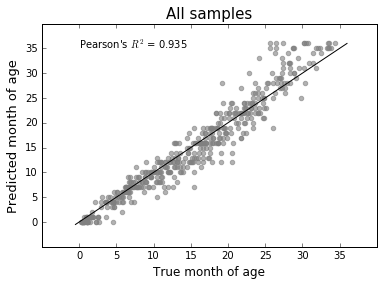

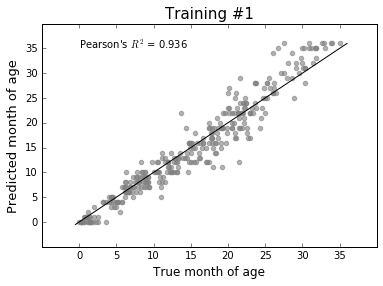

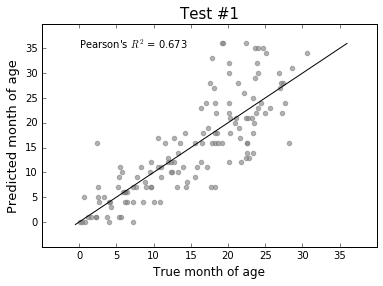

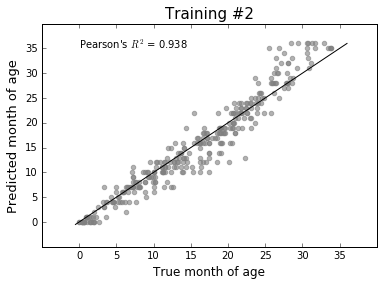

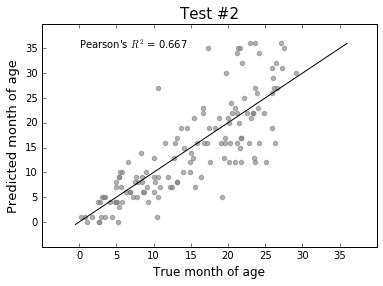

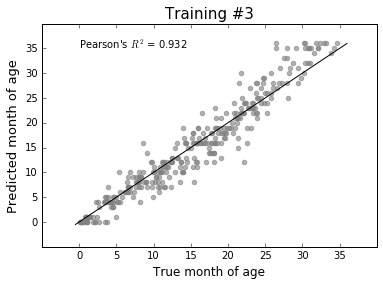

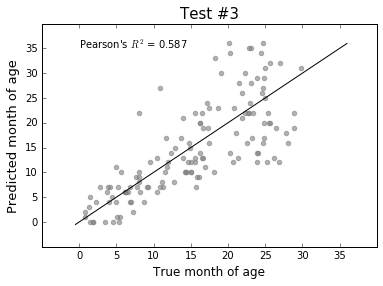

In [57]:
list_25_f_loc = list_idx[:25]

df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_25 = df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_25_f_loc]
list_25_f_names = list(df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_25_f_loc].columns)

list_25_f_names

x_25 = df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_25
y = df_age_460_le36['month']

regr_rf_25 = rfr(max_depth=30, random_state=2)
regr_rf_25.fit(x_25, y)
y_25 = regr_rf_25.predict(x_25)

corr_y__y_25 = np.corrcoef(list(y), list(y_25))[0, 1]

score_25 = regr_rf_25.score(x_25, y)
cross_val_25_mean = cross_val_score(regr_rf_25, x_25, y).mean()

plotScatter(y, y_25, 'All samples')

X_25_train1, X_25_test1, y_25_train1, y_25_test1 = train_test_split(x_25, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=1)

X_25_train2, X_25_test2, y_25_train2, y_25_test2 = train_test_split(x_25, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=2)

X_25_train3, X_25_test3, y_25_train3, y_25_test3 = train_test_split(x_25, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=3)

regr_rf_25_subtest_1 = rfr(max_depth=30, random_state=2)
regr_rf_25_subtest_1.fit(X_25_train1, y_25_train1)

y_rf_25_train1 = regr_rf_25_subtest_1.predict(X_25_train1)
y_rf_25_test1 = regr_rf_25_subtest_1.predict(X_25_test1)

regr_rf_25_subtest_2 = rfr(max_depth=30, random_state=2)
regr_rf_25_subtest_2.fit(X_25_train2, y_25_train2)

y_rf_25_train2 = regr_rf_25_subtest_2.predict(X_25_train2)
y_rf_25_test2 = regr_rf_25_subtest_2.predict(X_25_test2)

regr_rf_25_subtest_3 = rfr(max_depth=30, random_state=2)
regr_rf_25_subtest_3.fit(X_25_train3, y_25_train3)

y_rf_25_train3 = regr_rf_25_subtest_3.predict(X_25_train3)
y_rf_25_test3 = regr_rf_25_subtest_3.predict(X_25_test3)

plotScatter(y_25_train1, y_rf_25_train1, 'Training #1')
plotScatter(y_25_test1, y_rf_25_test1, 'Test #1')

plotScatter(y_25_train2, y_rf_25_train2, 'Training #2')
plotScatter(y_25_test2, y_rf_25_test2, 'Test #2')

plotScatter(y_25_train3, y_rf_25_train3, 'Training #3')
plotScatter(y_25_test3, y_rf_25_test3, 'Test #3')